In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

# 读取数据

In [2]:
data = pd.read_csv('广发data.csv', index_col=0)

In [3]:
data.head()

,open,close,high,low,volume,money
2010-04-16 09:16:00,3450.0,3470.0,3488.0,3450.0,490.0,509212140.0
2010-04-16 09:17:00,3468.0,3467.0,3473.8,3467.0,306.0,318622800.0
2010-04-16 09:18:00,3467.0,3467.0,3471.0,3466.0,198.0,206012040.0
2010-04-16 09:19:00,3467.0,3448.0,3468.2,3448.0,282.0,292809960.0
2010-04-16 09:20:00,3448.0,3454.0,3460.0,3448.0,248.0,257066520.0


In [4]:
data.shape

(314280, 6)

In [5]:
data.columns

Index(['open', 'close', 'high', 'low', 'volume', 'money'], dtype='object')

In [6]:
data.tail()

,open,close,high,low,volume,money
2015-01-30 15:11:00,3436.0,3434.0,3441.4,3433.2,4273.0,4.406183e+09
2015-01-30 15:12:00,3433.4,3434.2,3438.0,3432.8,3517.0,3.624872e+09
2015-01-30 15:13:00,3435.0,3429.8,3436.0,3427.4,5562.0,5.723915e+09
2015-01-30 15:14:00,3429.8,3427.6,3430.8,3425.2,4417.0,4.541500e+09
2015-01-30 15:15:00,3427.2,3429.2,3430.8,3420.0,7163.0,7.361342e+09


In [7]:
data.index = pd.to_datetime(data.index)

In [8]:
data['date'] = data.index.date
data['hour'] = data.index.time


In [9]:
#检查是否每天数据一样
data['date'].value_counts().unique()

array([270])

In [10]:
data.head()

,open,close,high,low,volume,money,date,hour
2010-04-16 09:16:00,3450.0,3470.0,3488.0,3450.0,490.0,509212140.0,2010-04-16,09:16:00
2010-04-16 09:17:00,3468.0,3467.0,3473.8,3467.0,306.0,318622800.0,2010-04-16,09:17:00
2010-04-16 09:18:00,3467.0,3467.0,3471.0,3466.0,198.0,206012040.0,2010-04-16,09:18:00
2010-04-16 09:19:00,3467.0,3448.0,3468.2,3448.0,282.0,292809960.0,2010-04-16,09:19:00
2010-04-16 09:20:00,3448.0,3454.0,3460.0,3448.0,248.0,257066520.0,2010-04-16,09:20:00


In [11]:
#样本内回测数据
backtest_data = data.loc['2010-04-16':'2012-12-31']

#样本外测试数据
test_data = data['2013-01-04':]

In [12]:
backtest_data.iloc[267:]

,open,close,high,low,volume,money,date,hour
2010-04-16 15:13:00,3417.0,3416.0,3418.6,3416.0,196.0,2.009298e+08,2010-04-16,15:13:00
2010-04-16 15:14:00,3416.0,3416.6,3416.8,3415.6,151.0,1.547615e+08,2010-04-16,15:14:00
2010-04-16 15:15:00,3416.6,3415.6,3417.6,3414.2,220.0,2.254256e+08,2010-04-16,15:15:00
2010-04-19 09:16:00,3396.0,3392.0,3398.0,3391.0,572.0,5.824763e+08,2010-04-19,09:16:00
2010-04-19 09:17:00,3391.2,3394.8,3396.2,3391.2,287.0,2.922323e+08,2010-04-19,09:17:00
...,...,...,...,...,...,...,...,...
2012-12-31 15:11:00,2539.0,2538.6,2539.2,2538.2,1015.0,7.730047e+08,2012-12-31,15:11:00
2012-12-31 15:12:00,2538.8,2538.8,2539.0,2537.4,1762.0,1.341627e+09,2012-12-31,15:12:00
2012-12-31 15:13:00,2538.6,2538.2,2538.6,2537.8,1457.0,1.109413e+09,2012-12-31,15:13:00
2012-12-31 15:14:00,2538.2,2535.6,2538.2,2535.6,3391.0,2.580689e+09,2012-12-31,15:14:00


In [13]:
test_data

,open,close,high,low,volume,money,date,hour
2013-01-04 09:16:00,2565.0,2577.0,2580.0,2565.0,239.0,1.847002e+08,2013-01-04,09:16:00
2013-01-04 09:17:00,2576.4,2574.6,2577.0,2571.6,141.0,1.088798e+08,2013-01-04,09:17:00
2013-01-04 09:18:00,2574.4,2575.2,2576.4,2574.4,112.0,8.654076e+07,2013-01-04,09:18:00
2013-01-04 09:19:00,2575.4,2574.6,2576.2,2574.2,44.0,3.399240e+07,2013-01-04,09:19:00
2013-01-04 09:20:00,2574.6,2575.8,2576.8,2574.6,54.0,4.173018e+07,2013-01-04,09:20:00
...,...,...,...,...,...,...,...,...
2015-01-30 15:11:00,3436.0,3434.0,3441.4,3433.2,4273.0,4.406183e+09,2015-01-30,15:11:00
2015-01-30 15:12:00,3433.4,3434.2,3438.0,3432.8,3517.0,3.624872e+09,2015-01-30,15:12:00
2015-01-30 15:13:00,3435.0,3429.8,3436.0,3427.4,5562.0,5.723915e+09,2015-01-30,15:13:00
2015-01-30 15:14:00,3429.8,3427.6,3430.8,3425.2,4417.0,4.541500e+09,2015-01-30,15:14:00


In [14]:
mssThreshold = 9/10000      #情绪平稳度阈值
stopLossThreshold = -0.005  #止损阈值
transactionCost = 2/10000   #交易成本（双边）

In [15]:
class MarketSentimentStrategy:
    
    MORNING_BEGIN = "09:16:00"    #一日开始，盘前交易
    MORNING_END = "11:30:00"      #早盘结束
    AFTERNOON_BEGIN = "11:12:00"  #午盘观察窗口起始时间点
    AFTERNOON_END = "15:15:00"    #午盘结束
    
    OBS_WINDOW = 50               #早盘观察窗口50分钟
    NOON_OBS_WINDOW = OBS_WINDOW+1 #下午盘11:12至13:32共51分钟
    
    
    def __init__(self, df, mss_threshold, stop_loss_threshold, transaction_cost, open_twice = False):
        """
        Input:
        - df: DataFrame of market CLOSE data
        - mss_threshold: the threshold of market sentiment
        - stop_loss_threshold: the threshold of stop loss
        - transaction_cost: transaction cost 
        - open_twice: default is False; If true, open two times a day
        """
        self.open_twice = open_twice
        if self.open_twice:       #如果一日开仓两次，将一日数据按观察时间分为早午两盘
            self.df_am = df.between_time(self.MORNING_BEGIN, self.MORNING_END)
            self.df_pm = df.between_time(self.AFTERNOON_BEGIN, self.AFTERNOON_END )
        else:
            self.df = df
        self.mss_threshold = mss_threshold
        self.stop_loss_threshold = stop_loss_threshold
        self.transaction_cost = transaction_cost
        

    def take_action(self):
        """
        Calculate the market sentiment stability, if the market sentiment stability below market sentiment
        threshold, then take action today, return True.
        """
        if self.open_twice:
            am_avg_maxDD = (1 - self.df_am.iloc[:self.OBS_WINDOW] / self.df_am.iloc[:self.OBS_WINDOW].cummax()).mean()
            am_avg_rev_maxDD = (self.df_am.iloc[:self.OBS_WINDOW]/self.df_am.iloc[:self.OBS_WINDOW].cummin() - 1).mean()
            am_mkt_stmt_stab = min(am_avg_maxDD, am_avg_rev_maxDD)
            am_result = am_mkt_stmt_stab < self.mss_threshold
            
            pm_avg_maxDD = (1 - self.df_pm.iloc[:self.NOON_OBS_WINDOW] / self.df_pm.iloc[:self.NOON_OBS_WINDOW].cummax()).mean()
            pm_avg_rev_maxDD = (self.df_pm.iloc[:self.NOON_OBS_WINDOW]/self.df_pm.iloc[:self.NOON_OBS_WINDOW].cummin() - 1).mean()
            pm_mkt_stmt_stab = min(pm_avg_maxDD, pm_avg_rev_maxDD)
            pm_result = pm_mkt_stmt_stab < self.mss_threshold

            return am_result, pm_result
        
        else:
            avg_maxDD = (1 - self.df.iloc[:self.OBS_WINDOW] / self.df.iloc[:self.OBS_WINDOW].cummax()).mean()
            avg_rev_maxDD = (self.df.iloc[:self.OBS_WINDOW]/self.df.iloc[:self.OBS_WINDOW].cummin() - 1).mean()
            mkt_stmt_stab = min(avg_maxDD, avg_rev_maxDD)

            return mkt_stmt_stab < self.mss_threshold
    
    
    def trend(self):
        """
        Compare the first minute price after observation with the first minute of market open
        If it's higher, then long the future, return 1; otherwise, short the future, return -1
        """
        if self.open_twice:
            am_trend = 1 if self.df_am.iloc[14] < self.df_am.iloc[self.OBS_WINDOW] else -1   #index 14 为9:30开盘
            pm_trend = 1 if self.df_pm.iloc[18] < self.df_pm.iloc[self.NOON_OBS_WINDOW] else -1 # index 18 为1:30开盘
         
            return am_trend, pm_trend
        
        else:
            return 1 if self.df.iloc[14] < self.df.iloc[self.OBS_WINDOW] else -1
    
    
    def calc_today_return(self, am_trend = 1, pm_trend = 1):
        """
        Calculate today return
        Input:
        - am_trend: default is 1; long is 1, short is -1
        - pm_trend: default is 1; long is 1, short is -1
        """
        if self.open_twice:
            # 第7分钟判断走势，第8分钟买入，收益从第9分钟开始计算，所以index+1为第8分钟价格
            #am_ret = (self.df_am.iloc[self.OBS_WINDOW + 2:] / self.df_am.iloc[self.OBS_WINDOW + 1] - 1) * am_trend
            am_ret = (self.df_am.iloc[self.OBS_WINDOW:] / self.df_am.iloc[self.OBS_WINDOW] - 1) * am_trend
            am_loss = am_ret.loc[am_ret<stopLossThreshold]
            if len(am_loss) == 0:
                am_ret = am_ret.iloc[-1]
            else:
                am_ret = am_loss.iloc[0]
            #pm_ret = (self.df_pm.iloc[self.NOON_OBS_WINDOW + 2:] / self.df_pm.iloc[self.NOON_OBS_WINDOW + 1] - 1) * pm_trend
            pm_ret = (self.df_pm.iloc[self.NOON_OBS_WINDOW :] / self.df_pm.iloc[self.NOON_OBS_WINDOW ] - 1) * pm_trend
            pm_loss = pm_ret.loc[pm_ret<stopLossThreshold]     #判断是否有超过止损线
            if len(pm_loss) == 0:
                pm_ret = pm_ret.iloc[-1]
            else:
                pm_ret = pm_loss.iloc[0]    
            return am_ret + pm_ret
        
        else:
            #today_ret = (self.df.iloc[self.OBS_WINDOW+2:] / self.df.iloc[self.OBS_WINDOW] - 1) * am_trend
            today_ret = (self.df.iloc[self.OBS_WINDOW:] / self.df.iloc[self.OBS_WINDOW] - 1) * am_trend
            today_loss = today_ret.loc[today_ret<stopLossThreshold]   #判断是否有超过止损线
            if len(today_loss) == 0:
                
                today_ret = today_ret.iloc[-1] - 2*transactionCost   #扣去双边交易成本
            else:
                today_ret = today_loss.iloc[0] - 2*transactionCost   #如果超过止损线，则当日收益按亏损那分钟收益计算
                
            return today_ret  
        
        
    def calc_minutely_return(self):
        if self.open_twice:
            am_ret = (self.df_am.iloc[self.OBS_WINDOW:].shift() / self.df_am.iloc[self.OBS_WINDOW:] - 1).dropna()
            pm_ret = (self.df_pm.iloc[self.NOON_OBS_WINDOW:].shift() / self.df_pm.iloc[self.NOON_OBS_WINDOW:] - 1).dropna()
            
            return am_ret[1:], pm_ret[1:]  #第9分钟开始收益
        else:
            day_ret = (self.df.iloc[self.OBS_WINDOW].shift() / self.df.iloc[self.OBS_WINDOW] - 1).dropna()
            return day_ret[1:] #第9分钟开始收益
    
    
    def plot_one_day_cum_ret(self, minutely_cum_ret):
        return daily_cum_ret.plot()

In [16]:
def performance(df, nums_trading):
    """
    Calculate strategy performance
    Input:
    - df: time series, daily return of strategy
    """
    
    annual_ret = df['Return'].describe().loc['mean'] * 250
    
    annual_std = df['Return'].describe().loc['std'] * 250 ** 0.5
    
    annual_sharp_ratio = annual_ret / annual_std
    
    max_dd = np.max(1 - ((1+df).cumprod()/(1+df).cumprod().cummax()))['Return']
    
    max_one_day_loss = df['Return'].describe().loc['min'] 
    
    max_one_day_gain = df['Return'].describe().loc['max']
    
    win_times = df['Return'].loc[df['Return']>0].count()
    
    loss_times = (df < 0).sum()['Return']
    
    odds = win_times / nums_trading
    
    avg_win_ret = df['Return'].loc[df['Return']>0].mean()
    
    avg_loss_ret = df['Return'].loc[df['Return']<0].mean()
    
    print("=" * 50)
    print("Number of Trading: ", nums_trading)
    print("Maximum One Day Loss: {}%".format(round(max_one_day_loss*100, 2)))
    print("Maximum One Day Gain: {}%".format(round(max_one_day_gain*100, 2)))
    print("Number of Win: ", win_times)
    print("Number of Loss: ", loss_times)
    print('Average Rate of Wining: {}%'.format(round(avg_win_ret*100, 2)))
    print('Average Rate of Loss: {}%'.format(round(avg_loss_ret*100, 2)))
    print("Odds: {}%".format(round(odds*100,2)))
    print("Annualized Return: {}%".format(round(annual_ret*100, 2)))
    print("Annualized Volatility: {}%".format(round(annual_std*100, 2)))
    print("Annualized Sharp Ratio: {}".format(round(annual_sharp_ratio, 2)))
    print("Maximum Drawdown: -{}%".format(round(max_dd*100, 2)))    
    

In [17]:
def startegy_daily_ret(Data):
    rets = []
    counts = 0

    date_list = Data['date'].unique()
    for date in date_list:
        df = Data.loc[date.strftime('%Y-%m-%d')]['close']
        S1 = MarketSentimentStrategy(df, mssThreshold, stopLossThreshold, transactionCost)
        if S1.take_action():
            counts += 1
            oneDayRet = S1.calc_today_return(am_trend = S1.trend())
            rets.append(oneDayRet)
        else:
            rets.append(0)
    Df = pd.DataFrame(rets,index=date_list, columns=['Return'])
    return Df, counts

In [18]:
def plot_cum_ret(daily_rets, Data):
    (1+daily_rets).cumprod().plot(figsize=[12,6])
    
    date_list = Data['date'].unique()
    fig, ax1 = plt.subplots(figsize=(15, 7))
    ax2 = ax1.twinx()
    ax1.plot(date_list, (1+daily_rets).cumprod(), 'b-')
    ax2.plot(Data.index, Data['close'], 'g-')

# 日内单次交易

In [19]:
backtest_ret, bt_count = startegy_daily_ret(backtest_data)

In [20]:
print(backtest_ret)

              Return
2010-04-16  0.000000
2010-04-19  0.052278
2010-04-20  0.000000
2010-04-21 -0.005550
2010-04-22 -0.007596
...              ...
2012-12-25  0.020322
2012-12-26  0.000332
2012-12-27  0.000000
2012-12-28  0.000000
2012-12-31  0.000000

[661 rows x 1 columns]


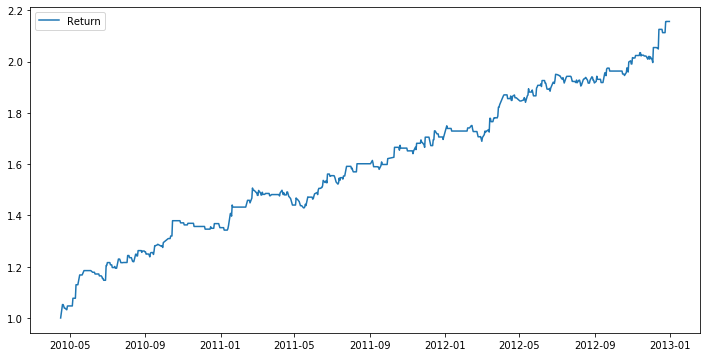

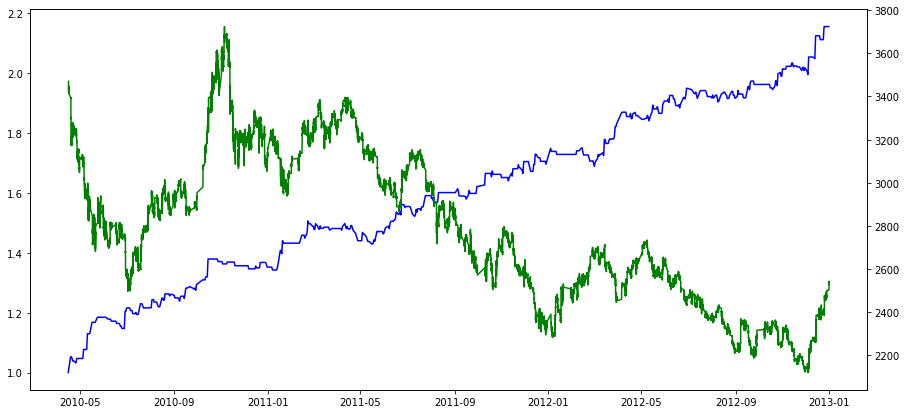

In [21]:
plot_cum_ret(backtest_ret , backtest_data)

In [22]:
performance(backtest_ret, bt_count)

Number of Trading:  330
Maximum One Day Loss: -0.93%
Maximum One Day Gain: 5.23%
Number of Win:  164
Number of Loss:  166
Average Rate of Wining: 1.0%
Average Rate of Loss: -0.52%
Odds: 49.7%
Annualized Return: 29.79%
Annualized Volatility: 12.04%
Annualized Sharp Ratio: 2.47
Maximum Drawdown: -5.13%


In [23]:
test_ret, test_count = startegy_daily_ret(test_data)

In [24]:
print(test_ret)

              Return
2013-01-04  0.005998
2013-01-07  0.000000
2013-01-08 -0.006173
2013-01-09  0.000000
2013-01-10  0.000000
...              ...
2015-01-26  0.000000
2015-01-27  0.012196
2015-01-28  0.000000
2015-01-29  0.000000
2015-01-30  0.000000

[503 rows x 1 columns]


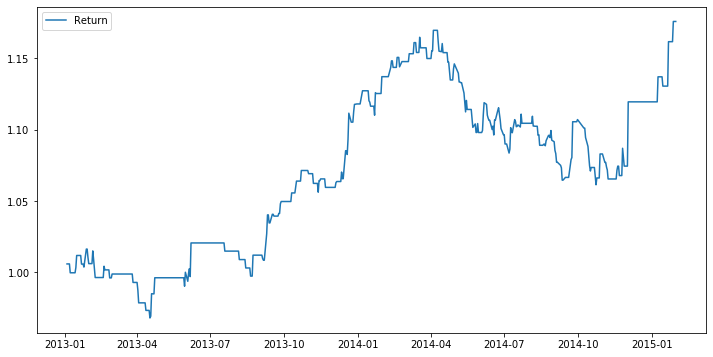

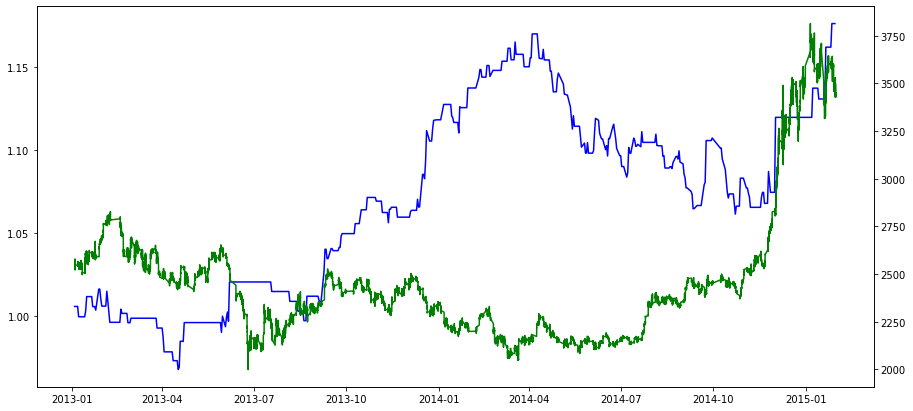

In [25]:
plot_cum_ret(test_ret, test_data)

In [26]:
performance(test_ret, test_count)

Number of Trading:  200
Maximum One Day Loss: -0.9%
Maximum One Day Gain: 4.19%
Number of Win:  88
Number of Loss:  112
Average Rate of Wining: 0.77%
Average Rate of Loss: -0.45%
Odds: 44.0%
Annualized Return: 8.35%
Annualized Volatility: 7.72%
Annualized Sharp Ratio: 1.08
Maximum Drawdown: -9.26%


In [27]:
total_ret, total_count = startegy_daily_ret(data) 

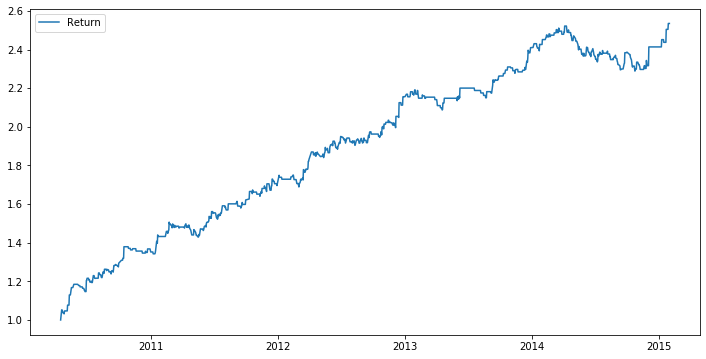

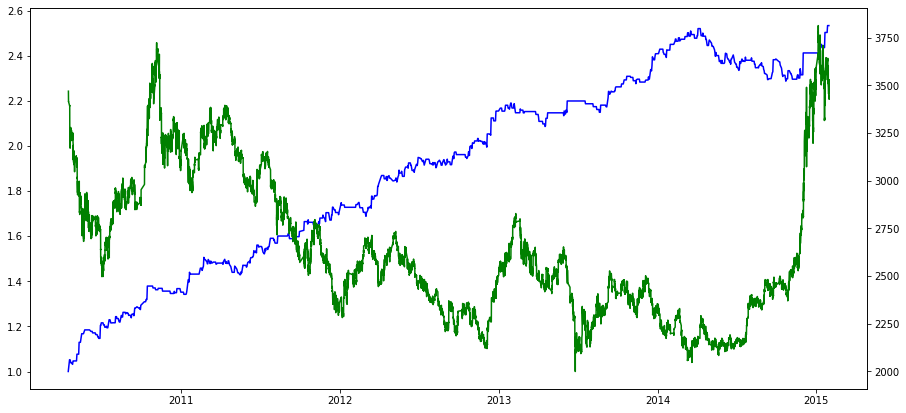

In [28]:
plot_cum_ret(total_ret, data)

In [29]:
performance(total_ret, total_count)

Number of Trading:  530
Maximum One Day Loss: -0.93%
Maximum One Day Gain: 5.23%
Number of Win:  252
Number of Loss:  278
Average Rate of Wining: 0.92%
Average Rate of Loss: -0.49%
Odds: 47.55%
Annualized Return: 20.53%
Annualized Volatility: 10.42%
Annualized Sharp Ratio: 1.97
Maximum Drawdown: -9.26%


# 日内多次交易

In [30]:
def startegy_two_daily_ret(Data):
    rets2 = []
    counts2 = 0

    date_list = Data['date'].unique()
    for date in date_list:
        df2 = Data.loc[date.strftime('%Y-%m-%d')]['close']
        S2 = MarketSentimentStrategy(df2, mssThreshold, stopLossThreshold, transactionCost, open_twice=True)
        am_res, pm_res = S2.take_action()
        am_tre, pm_tre = S2.trend()
        if am_res and pm_res:
            counts2 += 2
            oneDayRet = S2.calc_today_return(am_trend = am_tre, pm_trend = pm_tre)
            rets2.append(oneDayRet)

        elif am_res and not pm_res:
            counts2 += 1
            oneDayRet = S2.calc_today_return(am_trend = am_tre, pm_trend = 0)
            rets2.append(oneDayRet)

        elif not am_res and pm_res:
            counts2 += 1
            oneDayRet = S2.calc_today_return(am_trend = 0, pm_trend = pm_tre)
            rets2.append(oneDayRet)

        else:
            rets2.append(0)
    Df = pd.DataFrame(rets2,index=date_list, columns=['Return'])
    return Df, counts2

In [31]:
backtest2_ret, bt2_count = startegy_two_daily_ret(backtest_data)

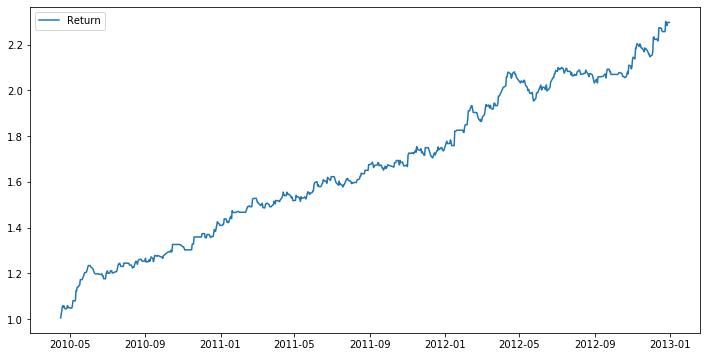

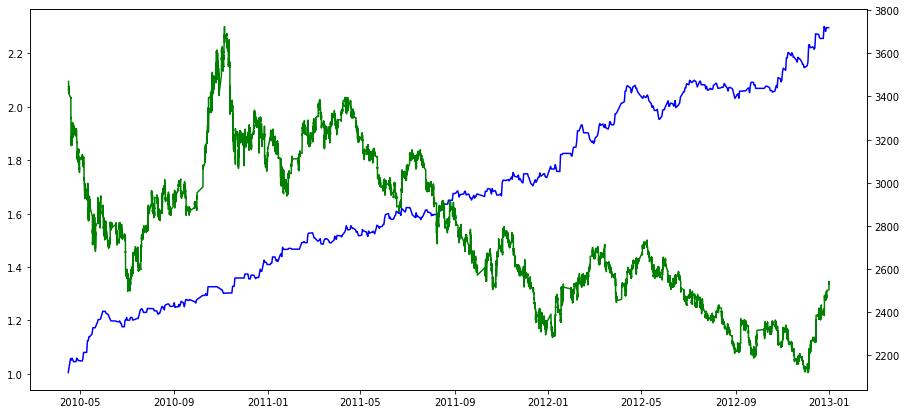

In [32]:
plot_cum_ret(backtest2_ret , backtest_data)

In [33]:
performance(backtest2_ret, bt2_count)

Number of Trading:  678
Maximum One Day Loss: -1.35%
Maximum One Day Gain: 5.2%
Number of Win:  255
Number of Loss:  237
Average Rate of Wining: 0.76%
Average Rate of Loss: -0.46%
Odds: 37.61%
Annualized Return: 32.12%
Annualized Volatility: 11.55%
Annualized Sharp Ratio: 2.78
Maximum Drawdown: -6.1%


In [34]:
test2_ret, test2_count = startegy_two_daily_ret(test_data)

In [35]:
performance(test2_ret, test2_count) 

Number of Trading:  444
Maximum One Day Loss: -1.21%
Maximum One Day Gain: 2.13%
Number of Win:  163
Number of Loss:  152
Average Rate of Wining: 0.59%
Average Rate of Loss: -0.42%
Odds: 36.71%
Annualized Return: 15.93%
Annualized Volatility: 8.1%
Annualized Sharp Ratio: 1.97
Maximum Drawdown: -5.53%


In [36]:
total_ret2, total2_count = startegy_two_daily_ret(data) 

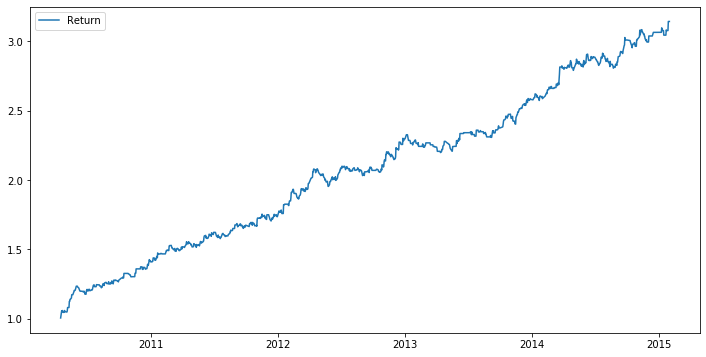

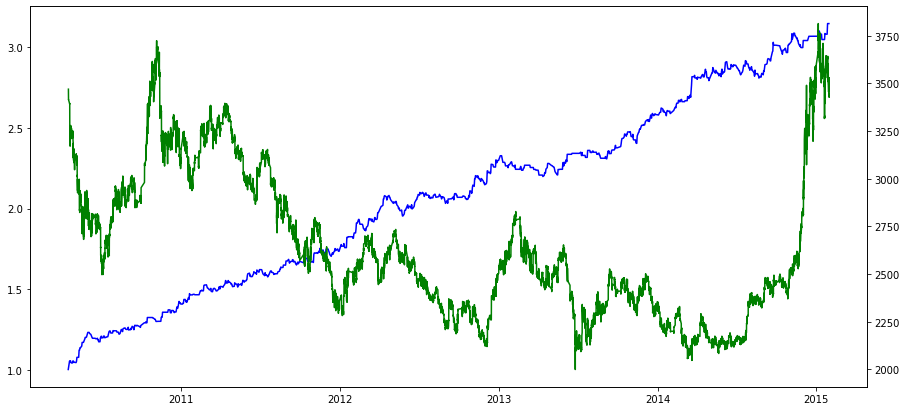

In [37]:
plot_cum_ret(total_ret2 , data)

In [38]:
performance(total_ret2, total2_count)

Number of Trading:  1122
Maximum One Day Loss: -1.35%
Maximum One Day Gain: 5.2%
Number of Win:  418
Number of Loss:  389
Average Rate of Wining: 0.69%
Average Rate of Loss: -0.44%
Odds: 37.25%
Annualized Return: 25.12%
Annualized Volatility: 10.21%
Annualized Sharp Ratio: 2.46
Maximum Drawdown: -6.1%


def calc_maxdd(port):
    val_l = (1+port).cumprod()
    cummax_l = val_l.cummax()
    drawdown_l = -(val_l/cummax_l-1)
    maxdd_l = drawdown_l.max()

    return maxdd_l